In [5]:
import pywt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure

mydata = pd.read_csv("FinalData.csv")

lst = mydata.iloc[0].to_numpy()
lst = lst[1:]

mydata = mydata.T # transpose of the data frame
# print(mydata)

ind = mydata.index.values.tolist()
ind = ind[1:]

# print (ind)
# print (lst)



In [6]:

(cA, cD) = pywt.dwt(lst, 'db2', 'smooth') # using db2 wavelet function to decompose data 
A = pywt.idwt(cA, None, 'db2', 'smooth') # using inverse wavelet to reconstruct linear components
D = pywt.idwt(None, cD, 'db2', 'smooth') # using inverse wavelet to reconstruct non-linear components
# lst_rec = A + D # reconstruction of lst i.e data before decomposition


           data  linear components  non-linear components
7/1/2015     18          17.108253               0.891747
7/2/2015     11           9.455449               1.544551
7/3/2015      5          11.256570              -6.256570
7/4/2015     13          10.524519               2.475481
7/5/2015     14           9.921956               4.078044
...         ...                ...                    ...
12/27/2016   20          17.896234               2.103766
12/28/2016   22          19.325962               2.674038
12/29/2016   19          20.033494              -1.033494
12/30/2016   18          19.428525              -1.428525
12/31/2016   20          19.175240               0.824760

[550 rows x 3 columns]


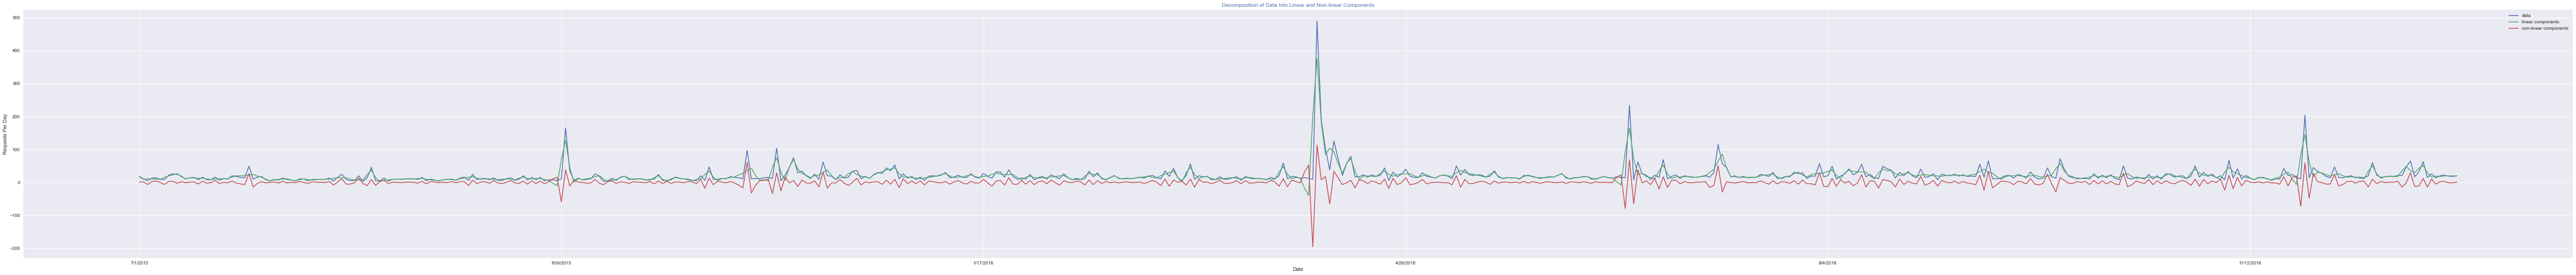

In [7]:
d = {'data': lst, 'linear components': A, 'non-linear components': D} # constructing map with non-decomposed and decomposed data
df = pd.DataFrame(d) # map -> data frame
df.index = ind 

print (df)


# figure(num=None, figsize=(100, 10), dpi=80, facecolor='w', edgecolor='k')
pl = df.plot(figsize=(100, 10), grid=True)
plt.xlabel('Date')
plt.ylabel('Requests Per Day')

mpl.style.use('seaborn')
pl.set_title('Decomposition of Data Into Linear and Non-linear Components'.format('seaborn'), color='C0')


pl.legend()

plt.show()

<ipython-input-9-743c3ba8fdb6>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=10.017200, expected=11.628607
predicted=24.809585, expected=16.688702
predicted=18.181577, expected=16.496715
predicted=17.645575, expected=17.408494
predicted=23.716720, expected=18.024519
predicted=14.951480, expected=16.241025
predicted=15.551594, expected=15.100481
predicted=16.061240, expected=17.350481
predicted=18.516583, expected=18.691987
predicted=17.572851, expected=30.337577
predicted=34.893282, expected=39.222196
predicted=32.127631, expected=64.659460
predicted=70.431340, expected=85.661456
predicted=70.614901, expected=43.092387
predicted=12.603897, expected=17.557133
predicted=42.442391, expected=19.860336
predicted=23.347555, expected=14.704247
predicted=19.021911, expected=15.800240
predicted=29.032787, expected=15.220994
predicted=10.446133, expected=15.674038
predicted=18.668131, expected=15.850481
predicted=14.729581, expected=19.563702
predicted=21.308449, expected=22.329247
predicted=20.075890, expected=23.562500
predicted=22.764516, expected=25.206329


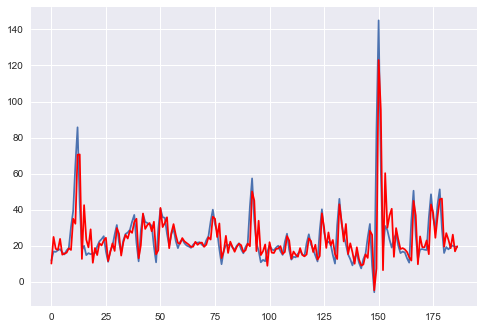

In [9]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
# split into train and test sets
# X = series.values
X = A
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()